In [1]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Flatten, BatchNormalization, Dropout, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
import gc
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
np.random.randint(10)

0

In [3]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [4]:
seconds = 10
samplerate = 10
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(1, 1, 1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)
print("train", np.sum(train_labels, axis = 0))

train [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Fit model

In [5]:
input_shape=(train_x.shape[1], train_x.shape[2])
input_shape

(500, 25)

In [6]:
model = keras.Sequential()
model.add(BatchNormalization(input_shape=(train_x.shape[1], train_x.shape[2])))

model.add(LSTM(16, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = True,
          #     recurrent_dropout = .5,
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
model.add(LSTM(32, 
             #  input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = False,
  #             recurrent_dropout = .5,
               go_backwards = True
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(16, activation= "relu"))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
del train_x, train_labels, val_x, val_labels, class_weights
gc.collect()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 500, 25)           100       
_________________________________________________________________
lstm (LSTM)                  (None, 500, 16)           2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 16)           64        
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6272      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense (Dense)                (None, 12)                396       
Total params: 9,648
Trainable params: 9,502
Non-trainable params: 146
____________________________________________________

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
12000/12000 [==============================] - 9s 753us/sample


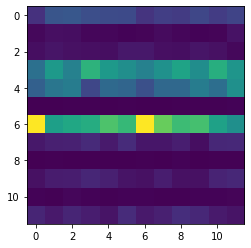

96000/96000 [==============================] - 69s 723us/sample


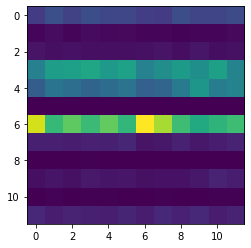

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 2/2
12000/12000 [==============================] - 9s 779us/sample


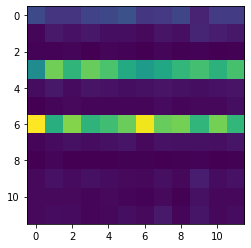

96000/96000 [==============================] - 70s 729us/sample


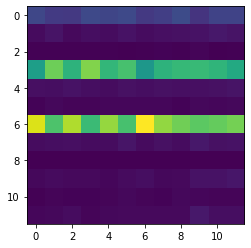

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 3/3
12000/12000 [==============================] - 13s 1ms/sample


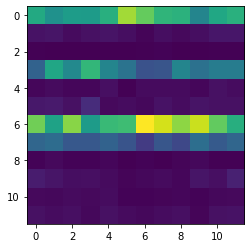

96000/96000 [==============================] - 83s 863us/sample


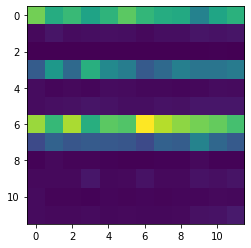

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 4/4
12000/12000 [==============================] - 12s 960us/sample


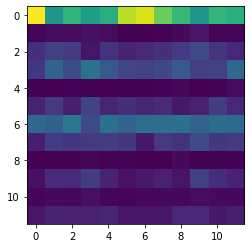

96000/96000 [==============================] - 86s 898us/sample


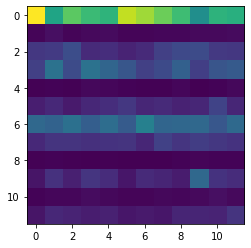

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 5/5
12000/12000 [==============================] - 12s 986us/sample


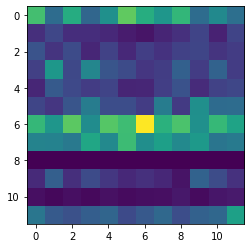

96000/96000 [==============================] - 83s 867us/sample


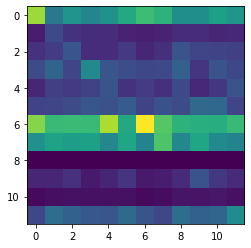

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 6/6
12000/12000 [==============================] - 11s 934us/sample


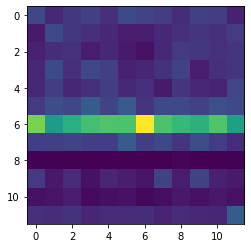

96000/96000 [==============================] - 85s 880us/sample


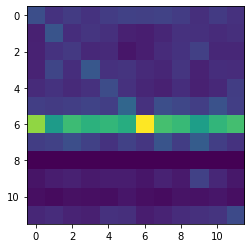

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 7/7
12000/12000 [==============================] - 12s 990us/sample


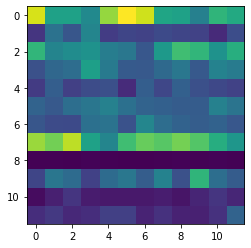

96000/96000 [==============================] - 86s 898us/sample


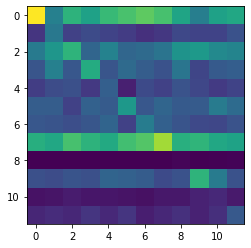

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 8/8
12000/12000 [==============================] - 12s 963us/sample


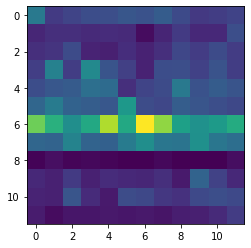

96000/96000 [==============================] - 111s 1ms/sample


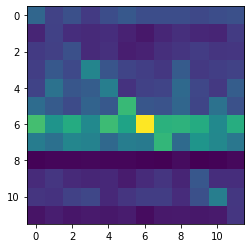

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 9/9
12000/12000 [==============================] - 12s 998us/sample


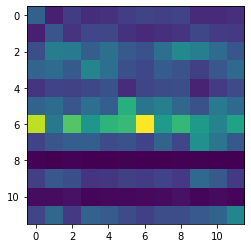

96000/96000 [==============================] - 91s 951us/sample


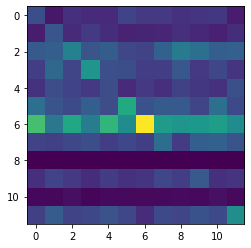

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 10/10
12000/12000 [==============================] - 13s 1ms/sample


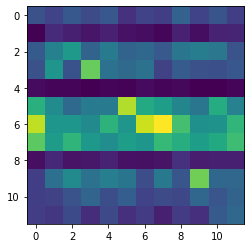

96000/96000 [==============================] - 99s 1ms/sample


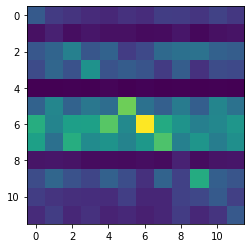

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 11/11
12000/12000 [==============================] - 13s 1ms/sample


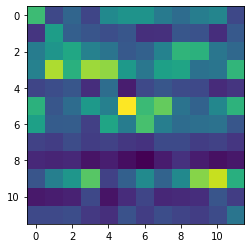

96000/96000 [==============================] - 98s 1ms/sample


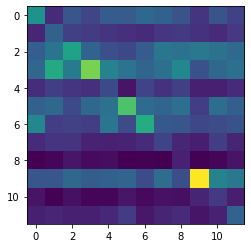

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 12/12
12000/12000 [==============================] - 13s 1ms/sample


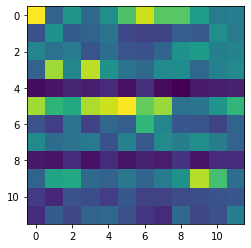

96000/96000 [==============================] - 99s 1ms/sample


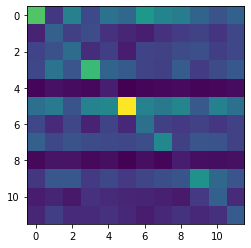

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 13/13
12000/12000 [==============================] - 13s 1ms/sample


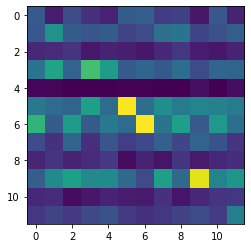

96000/96000 [==============================] - 218s 2ms/sample


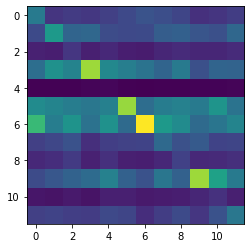

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 14/14
12000/12000 [==============================] - 13s 1ms/sample


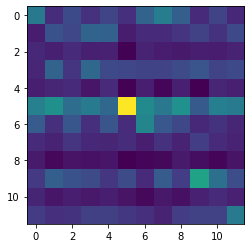

96000/96000 [==============================] - 104s 1ms/sample


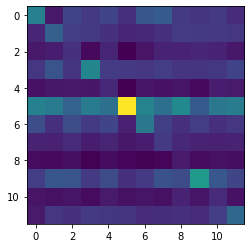

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 15/15
12000/12000 [==============================] - 13s 1ms/sample


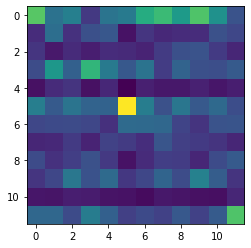

96000/96000 [==============================] - 108s 1ms/sample


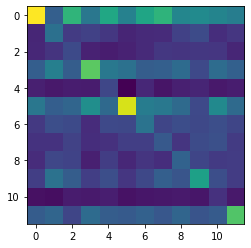

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 16/16
12000/12000 [==============================] - 14s 1ms/sample


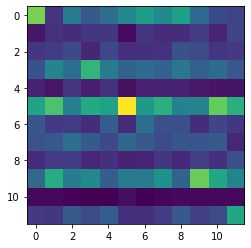

96000/96000 [==============================] - 111s 1ms/sample


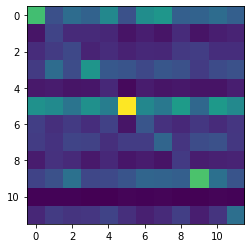

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 17/17
12000/12000 [==============================] - 14s 1ms/sample


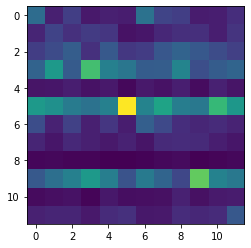

96000/96000 [==============================] - 129s 1ms/sample


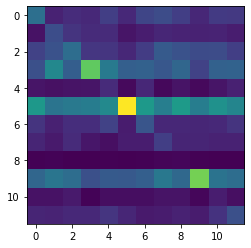

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 18/18
12000/12000 [==============================] - 14s 1ms/sample


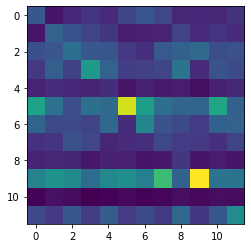

96000/96000 [==============================] - 110s 1ms/sample


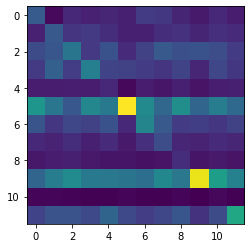

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 19/19
12000/12000 [==============================] - 14s 1ms/sample


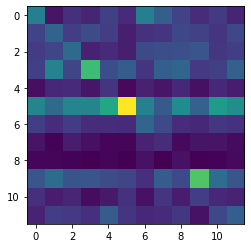

96000/96000 [==============================] - 102s 1ms/sample


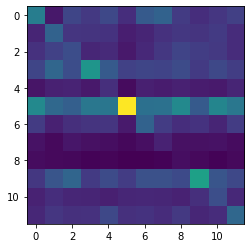

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 20/20
12000/12000 [==============================] - 14s 1ms/sample


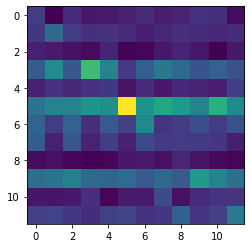

96000/96000 [==============================] - 108s 1ms/sample


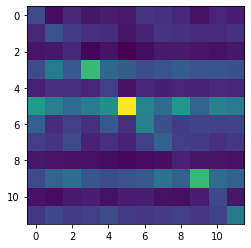

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 21/21
12000/12000 [==============================] - 14s 1ms/sample


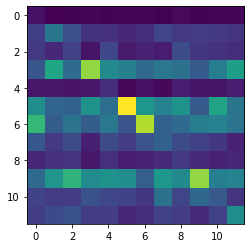

96000/96000 [==============================] - 111s 1ms/sample


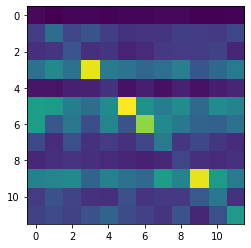

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 22/22
12000/12000 [==============================] - 14s 1ms/sample


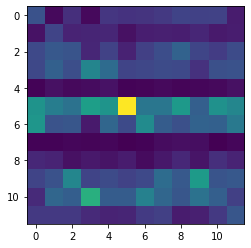

96000/96000 [==============================] - 110s 1ms/sample


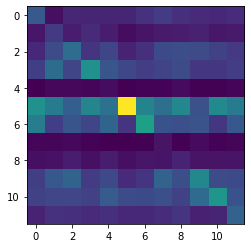

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 23/23
12000/12000 [==============================] - 14s 1ms/sample


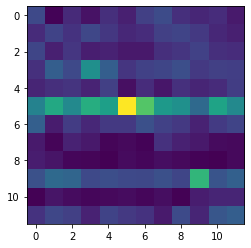

96000/96000 [==============================] - 107s 1ms/sample


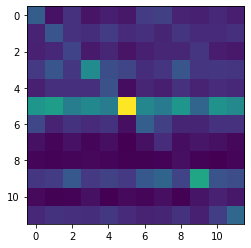

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 24/24
12000/12000 [==============================] - 14s 1ms/sample


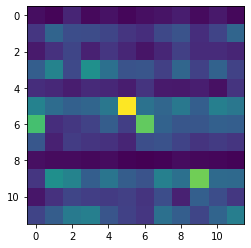

96000/96000 [==============================] - 94s 975us/sample


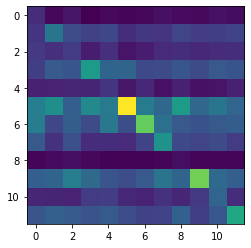

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 25/25
12000/12000 [==============================] - 14s 1ms/sample


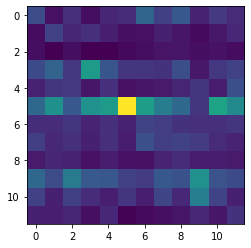

96000/96000 [==============================] - 94s 981us/sample


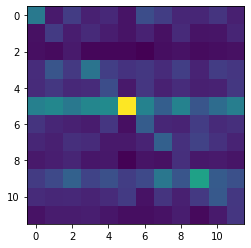

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 26/26
12000/12000 [==============================] - 14s 1ms/sample


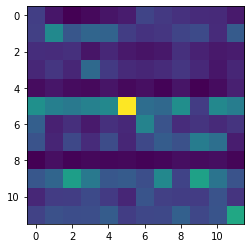

96000/96000 [==============================] - 92s 958us/sample


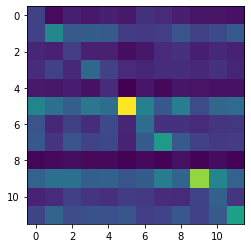

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 27/27
12000/12000 [==============================] - 14s 1ms/sample


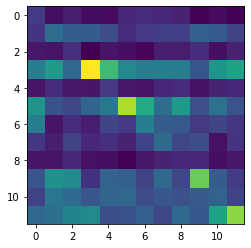

96000/96000 [==============================] - 93s 967us/sample


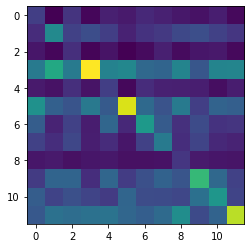

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 28/28
12000/12000 [==============================] - 24s 2ms/sample


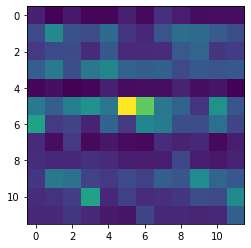

96000/96000 [==============================] - 114s 1ms/sample


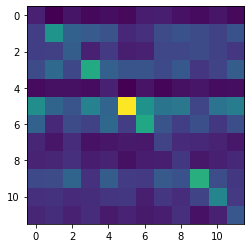

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 29/29
12000/12000 [==============================] - 14s 1ms/sample


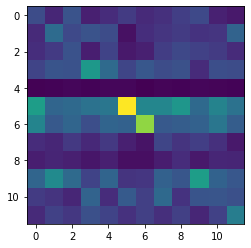

96000/96000 [==============================] - 94s 976us/sample


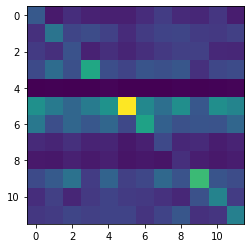

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 30/30
12000/12000 [==============================] - 14s 1ms/sample


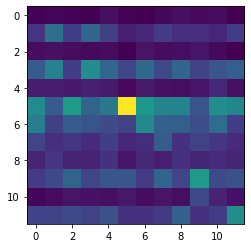

96000/96000 [==============================] - 103s 1ms/sample


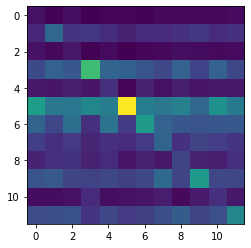

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 31/31
12000/12000 [==============================] - 14s 1ms/sample


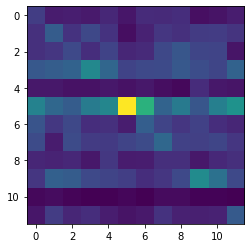

96000/96000 [==============================] - 102s 1ms/sample


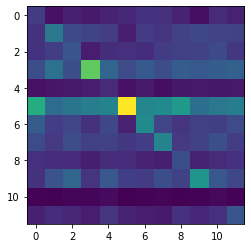

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 32/32
12000/12000 [==============================] - 14s 1ms/sample


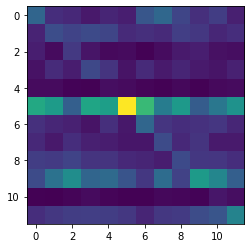

96000/96000 [==============================] - 108s 1ms/sample


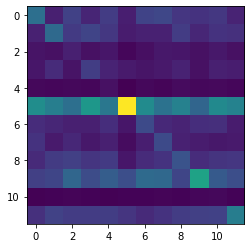

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 33/33
12000/12000 [==============================] - 14s 1ms/sample


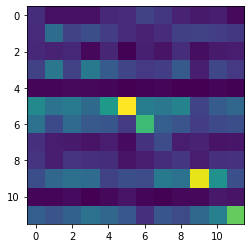

96000/96000 [==============================] - 102s 1ms/sample


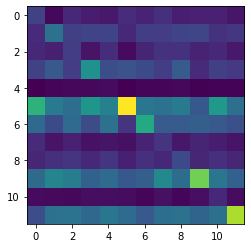

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 34/34
12000/12000 [==============================] - 15s 1ms/sample


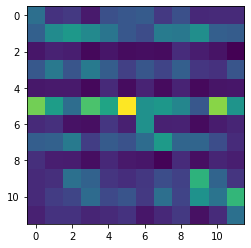

96000/96000 [==============================] - 102s 1ms/sample


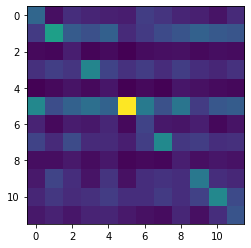

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 35/35
12000/12000 [==============================] - 14s 1ms/sample


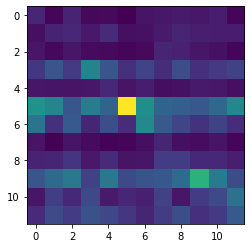

96000/96000 [==============================] - 104s 1ms/sample


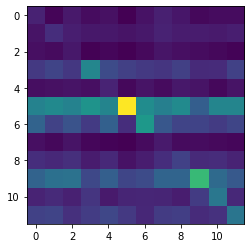

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 36/36
12000/12000 [==============================] - 14s 1ms/sample


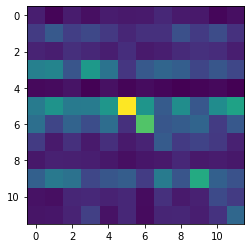

96000/96000 [==============================] - 114s 1ms/sample


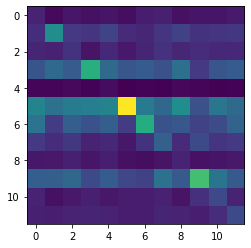

train [8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]
val [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
Train on 96000 samples, validate on 12000 samples
Epoch 37/37
 8192/96000 [=>............................] - ETA: 11:58 - loss: 2.4354 - acc: 0.1479

KeyboardInterrupt: 

In [7]:
#add recurrent dropout to add noise to duration
desc = "normin_LSTM16_32_Out_1Step_001LR_amsgrad"
log_dir = os.path.join(
    "logs",
    "Overfit",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 150
sample_n = None
val_n  = int(2*train_n/5)
valsample_n = 1000
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs = 1
iterations = 40
learn_rate = 0.001
batch_size = 4096
model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model, batch_size)